<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/tcc_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monta o google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Autentica o notebook

In [1]:
from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

# Dados dos hoteis

## Carrega a planilha

In [2]:
ws = gc.open('PGC-hotels')
emerson = ws.worksheet('Emerson')

## Cria o DataFrame

In [3]:
import pandas as pd

df = pd.DataFrame(emerson.get_all_records())
states = pd.DataFrame({'state': ["AC",
"AL",
"AM",
"AP",
"BA",
"CE",
"DF",
"ES",
"GO",
"MA",
"MG",
"MS",
"MT",
"PA",
"PB",
"PE",
"PI",
"PR",
"RJ",
"RN",
"RO",
"RR",
"RS",
"SC",
"SE",
"SP",
"TO"]})

df[:1]

,done,name,n_reviews,sort_by,hl,state,overall_rating,stars,url,all_inclusive,region,google_travel,busca,url_travel,qtd_reviews
0,1,Aram Beach & Convention,-1,newest,pt-br,PB,3.8,4,https://www.google.com/maps/place/Aram+Beach+%...,0,NORDESTE,https://www.google.com/travel/hotels/entity/Ch...,API,-,2617


## Visualização

### Distribuição por Estado

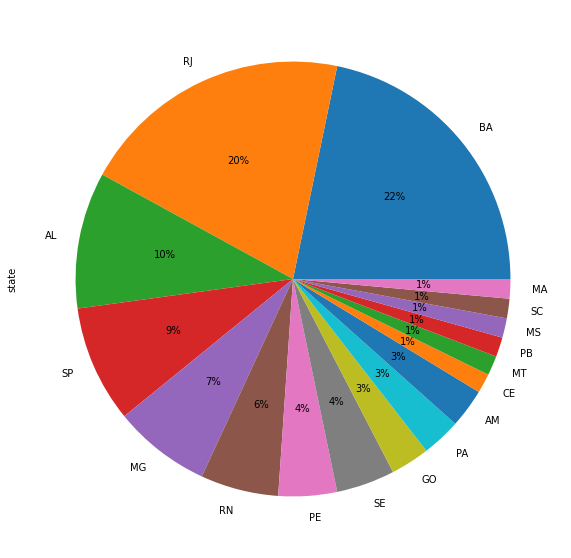

In [67]:
import matplotlib.pyplot as plt

df['state'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

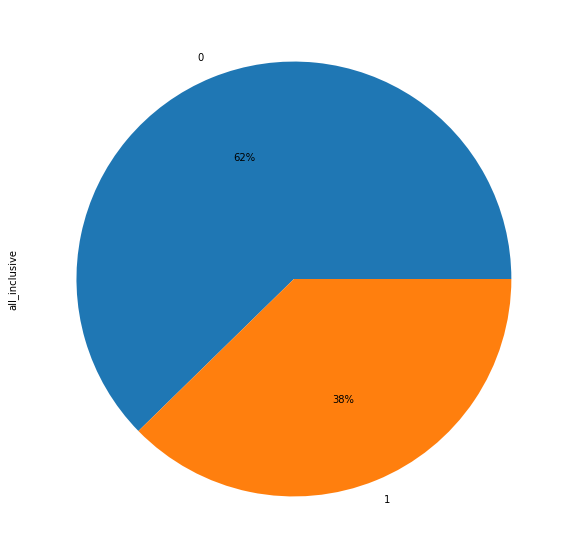

In [68]:
 df['all_inclusive'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [78]:
 df[['state', 'qtd_reviews']].groupby(['state']).sum().sort_values('qtd_reviews', ascending= False)

qtd_reviews               overall_rating               stars        
              sum    min    max           mean  min  max      mean min max
state                                                                     
AL          51599   2677  22660       4.600000  4.0  4.8  3.428571  -1   5
AM           3807    773   3034       4.550000  4.3  4.8  3.500000   2   5
BA          94921   2203  18718       4.346667  3.4  4.8  3.733333   1   5
CE           4249   4249   4249       4.300000  4.3  4.3  3.000000   3   3
GO          21046   9644  11402       4.200000  4.1  4.3  3.500000   3   4
MA           2910   2910   2910       3.900000  3.9  3.9  2.000000   2   2
MG          14161    817   4513       4.160000  3.4  4.7  2.200000  -1   4
MS           3199   3199   3199       4.800000  4.8  4.8  4.000000   4   4
MT           2744   2744   2744       4.700000  4.7  4.7  3.000000   3   3
PA           5228   2580   2648       4.150000  4.1  4.2  3.000000   3   3
PB           2617   2617   2617       3.800000  3.8  3.8  4.000000   4   4
PE           8281    575   5138       4.366667  3.9  4.7  2.000000  -1   5
RJ          43525    619   6619       3.828571  2.8  4.8  3.214286   2   5
RN          21422   2617  11520       4.375000  4.0  4.7  4.250000   3   5
SC          20829  20829  20829       4.700000  4.7  4.7  4.000000   4   4
SE           6861    511   5035       3.500000  2.7  4.3  2.000000  -1   4
SP          23706   1120   6129       4.000000  3.7  4.3  3.500000   3   4

In [139]:
 valores = df[['state', 'overall_rating', 'stars', 'qtd_reviews']].groupby(['state']).agg({'qtd_reviews': [ 'sum', 'min', 'max'], 'overall_rating': [ 'mean', 'min', 'max'], 'stars': [ 'mean']})

 valores

AttributeError: ignored

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f964eb2b5e0>,
      dtype=object)

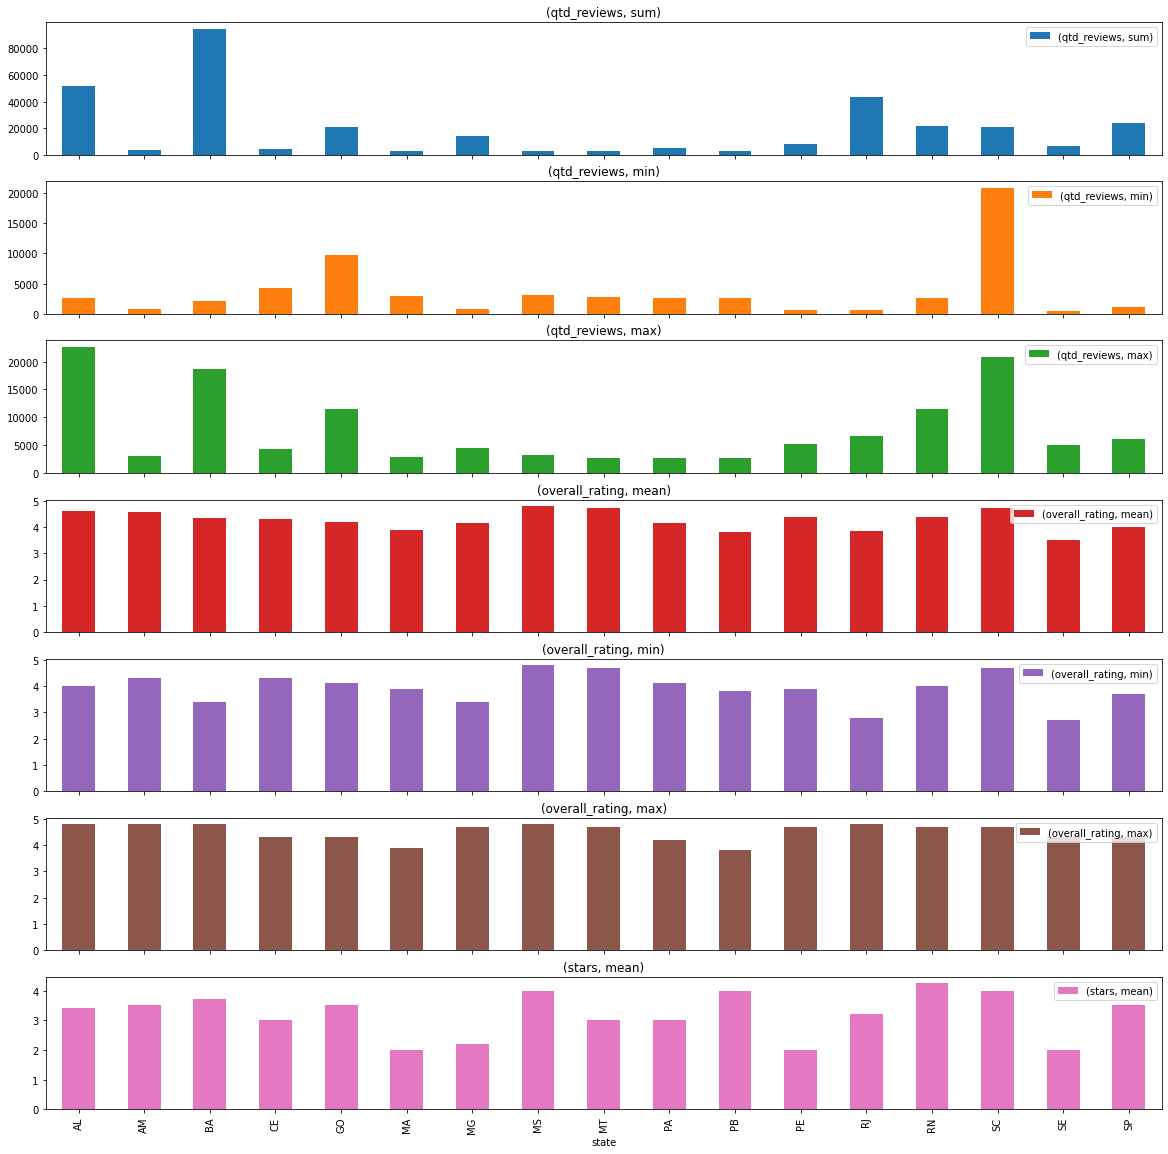

In [137]:
valores.plot(kind='bar', subplots=True, figsize=(20, 20))

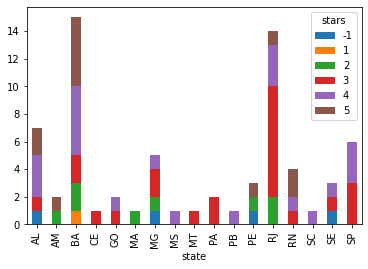

In [120]:
df.groupby(['state','stars']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
## estados sem hoteis
set(states.state).symmetric_difference(df.state)

{'AP', 'MS', 'PB', 'PI', 'RO', 'RR', 'TO'}

In [ ]:
# df[['state','stars']].join(states.set_index('state'), how='right', on='state').groupby(['state','stars'],dropna= False).size(.unstack().plot(kind='bar', stacked=True)

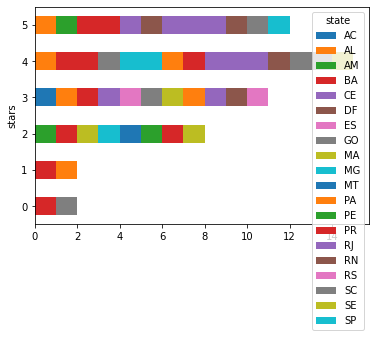

In [ ]:
df.groupby(['stars','state']).size().unstack().plot(kind='barh', stacked=True)

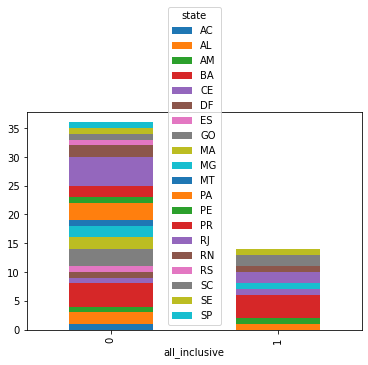

In [ ]:
df.groupby(['all_inclusive','state']).size().unstack().plot(kind='bar', stacked=True)

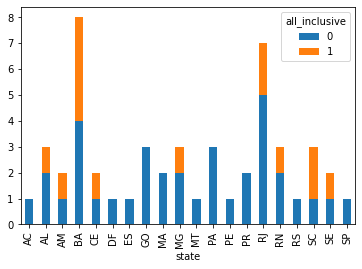

In [ ]:
df.groupby(['state','all_inclusive']).size().unstack().plot(kind='bar', stacked=True)